# Project : Speed dating - EDA
## 1. First steps
### 1.1. Imports & initial observations

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [2]:
df = pd.read_csv('Speed+Dating+Data.csv', encoding = "ISO-8859-1")
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [3]:
df.describe(include = 'all')

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
count,8378.000000,8377.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,8378.000000,6532.000000,8378.000000,...,3974.000000,3974.000000,3974.000000,3974.000000,3974.000000,2016.000000,2016.000000,2016.000000,2016.000000,2016.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,283.675937,8.960248,0.500597,17.327166,1.828837,11.350919,16.872046,9.042731,9.295775,8.927668,...,7.240312,8.093357,8.388777,7.658782,7.391545,6.810020,7.615079,7.932540,7.155258,7.048611
std,158.583367,5.491329,0.500029,10.940735,0.376673,5.995903,4.358458,5.514939,5.650199,5.477009,...,1.576596,1.610309,1.459094,1.744670,1.961417,1.507341,1.504551,1.340868,1.672787,1.717988
min,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,5.000000,1.000000,1.000000,1.000000,...,2.000000,2.000000,3.000000,2.000000,1.000000,2.000000,2.000000,4.000000,1.000000,1.000000
25%,154.000000,4.000000,0.000000,8.000000,2.000000,7.000000,14.000000,4.000000,4.000000,4.000000,...,7.000000,7.000000,8.000000,7.000000,6.000000,6.000000,7.000000,7.000000,6.000000,6.000000
50%,281.000000,8.000000,1.000000,16.000000,2.000000,11.000000,18.000000,8.000000,9.000000,8.000000,...,7.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,8.000000,7.000000,7.000000
75%,407.000000,13.000000,1.000000,26.000000,2.000000,15.000000,20.000000,13.000000,14.000000,13.000000,...,8.000000,9.000000,9.000000,9.000000,9.000000,8.000000,9.000000,9.000000,8.000000,8.000000


In [4]:
total_participants = len(df['iid'].value_counts())
print(f'There are overall {total_participants} participants')

total_partners = len(df['pid'].value_counts())
print(f'With {total_partners} partners')

total_waves = len(df['wave'].value_counts())
print(f'Involved in {total_waves} waves of speed dating events')

There are overall 551 participants
With 551 partners
Involved in 21 waves of speed dating events


In [5]:
df['iid'].value_counts()

552    22
530    22
528    22
527    22
526    22
       ..
136     5
135     5
134     5
133     5
132     5
Name: iid, Length: 551, dtype: int64

In [6]:
longest_wave = len(df['id'].value_counts())
print(f'The longest wave involved {longest_wave} dates')

longest_wave_participants = len(df['idg'].value_counts())
print(f'Involving {longest_wave_participants} participants')

The longest wave involved 22 dates
Involving 44 participants


In [41]:
df[df['wave'] == 1]

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3,position_indicator
0,1,1.0,0,1,1,1,10,7,NaN,4,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,
1,1,1.0,0,1,1,1,10,7,NaN,3,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,
2,1,1.0,0,1,1,1,10,7,NaN,10,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,
3,1,1.0,0,1,1,1,10,7,NaN,5,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,
4,1,1.0,0,1,1,1,10,7,NaN,7,...,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,20,10.0,1,20,1,1,10,8,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
196,20,10.0,1,20,1,1,10,5,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,
197,20,10.0,1,20,1,1,10,10,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,last
198,20,10.0,1,20,1,1,10,1,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,first


In [7]:
df_w1 = df[df['wave'] == 1]
print(df_w1.shape)
df_w1[df_w1['id'] == 9]

(200, 195)


,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
80,9,9.0,0,17,1,1,10,1,NaN,8,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81,9,9.0,0,17,1,1,10,1,NaN,7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
82,9,9.0,0,17,1,1,10,1,NaN,4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
83,9,9.0,0,17,1,1,10,1,NaN,9,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84,9,9.0,0,17,1,1,10,1,NaN,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
85,9,9.0,0,17,1,1,10,1,NaN,10,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,9,9.0,0,17,1,1,10,1,NaN,5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,9,9.0,0,17,1,1,10,1,NaN,6,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,9,9.0,0,17,1,1,10,1,NaN,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
89,9,9.0,0,17,1,1,10,1,NaN,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
females_w1_iid = [*df_w1[df_w1['gender'] == 1]['iid'].value_counts().index]
females_w1_id = [*df_w1[df_w1['gender'] == 1]['id'].value_counts().index]
females_w1_idg = [*df_w1[df_w1['gender'] == 1]['idg'].value_counts().index]


print(f'In w1 there are {len(females_w1_iid)} female participants')
print(f'Female participant iids in w1 : {females_w1_iid}')
print(f'Female participant ids in w1 : {females_w1_id}')
print(f'Female participant idgs in w1 : {females_w1_idg}')

print()

males_w1_iid = [*df_w1[df_w1['gender'] == 0]['iid'].value_counts().index]
males_w1_id = [*df_w1[df_w1['gender'] == 0]['id'].value_counts().index]
males_w1_idg = [*df_w1[df_w1['gender'] == 0]['idg'].value_counts().index]

print(f'In w1 there are {len(males_w1_iid)} male participants')
print(f'Male participant iids in w1 : {males_w1_iid}')
print(f'Male participant ids in w1 : {males_w1_id}')
print(f'Male participant idgs in w1 : {males_w1_idg}')

In w1 there are 10 female participants
Female participant iids in w1 : [11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
Female participant ids in w1 : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Female participant idgs in w1 : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In w1 there are 10 male participants
Male participant iids in w1 : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Male participant ids in w1 : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0]
Male participant idgs in w1 : [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]


In [9]:
df_w2 = df[df['wave'] == 2]

females_w2_iid = [*df_w2[df_w2['gender'] == 1]['iid'].value_counts().index]
females_w2_id = [*df_w2[df_w2['gender'] == 1]['id'].value_counts().index]
females_w2_idg = [*df_w2[df_w2['gender'] == 1]['idg'].value_counts().index]


print(f'In w2 there are {len(females_w2_iid)} female participants')
print(f'Female participant iids in w2 : {females_w2_iid}')
print(f'Female participant ids in w2 : {females_w2_id}')
print(f'Female participant idgs in w2 : {females_w2_idg}')

print()

males_w2_iid = [*df_w2[df_w2['gender'] == 0]['iid'].value_counts().index]
males_w2_id = [*df_w2[df_w2['gender'] == 0]['id'].value_counts().index]
males_w2_idg = [*df_w2[df_w2['gender'] == 0]['idg'].value_counts().index]

print(f'In w2 there are {len(males_w2_iid)} male participants')
print(f'Male participant iids in w2 : {males_w2_iid}')
print(f'Male participant ids in w2 : {males_w2_id}')
print(f'Male participant idgs in w2 : {males_w2_idg}')

In w2 there are 16 female participants
Female participant iids in w2 : [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55]
Female participant ids in w2 : [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0]
Female participant idgs in w2 : [2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32]

In w2 there are 19 male participants
Male participant iids in w2 : [21, 31, 38, 37, 36, 35, 34, 33, 32, 30, 22, 29, 28, 27, 26, 25, 24, 23, 39]
Male participant ids in w2 : [1.0, 11.0, 19.0, 17.0, 16.0, 15.0, 14.0, 13.0, 12.0, 10.0, 2.0, 9.0, 8.0, 7.0, 6.0, 5.0, 4.0, 3.0, 20.0]
Male participant idgs in w2 : [1, 21, 34, 33, 31, 29, 27, 25, 23, 19, 3, 17, 15, 13, 11, 9, 7, 5, 35]


First conclusions : 

The dataset rows correspond to a unique date between 2 participants, identified with their iid and pid
This means that for each date there is 2 rows, one for each participant of the date, the match can be made by comparing a pid with its matching pid for the corresponding wave

* wave : there are 21 waves with a variable number of participants in each wave, in a single wave each participant will cross the other a single time

* iid : is unique to every participant, there are therefore 551 participants to the study if we assume every participant participated to only 1 wave
* pid : counterpart to iid, in a given wave, a single date will be registered on 2 rows, each giving the appreciation of both participants : the pid is the id of the partner to participant identifier with iid
* idg : within a single wave, gendered ids, when the value of idg is even it seems to be a woman, odd a man

* id : id of the id of a date within a wave, each id will therefore group 2 different iid, pid and idg


# 2. EDA : answering relevant questions about the speed dating event

What are the least desirable attributes in a male partner? Does this differ for female partners?

How important do people think attractiveness is in potential mate selection vs. its real impact?

Are shared interests more important than a shared racial background?

Can people accurately predict their own perceived value in the dating market?

In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

2.1 : Can people predict their own perceived value in the dating market ? 

In [10]:
#Given scores :
rating = ['attr', 'sinc', 'intel', 'fun', 'amb']

In [11]:
#Before participating in the event (time 1)

#How do you think you measure up?
#Please rate your opinion of your own attributes, on a scale of 1-10 
own_rating_1 = ['attr3_1', 'sinc3_1', 'intel3_1', 'fun3_1', 'amb3_1']

#how do you think others perceive you? 
#Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 
perceived_rating_1 = ['attr5_1', 'sinc5_1', 'intel5_1', 'fun5_1', 'amb5_1']


#Day after the event (time 2)

#How do you think you measure up?
#Please rate your opinion of your own attributes, on a scale of 1-10 
own_rating_2 = ['attr3_2', 'sinc3_2', 'intel3_2', 'fun3_2', 'amb3_2']

#how do you think others perceive you? 
#Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 
perceived_rating_2 = ['attr5_2', 'sinc5_2', 'intel5_2', 'fun5_2', 'amb5_2']


#3-4 weeks after they had been sent their matches (time 3)

#How do you think you measure up?
#Please rate your opinion of your own attributes, on a scale of 1-10 
own_rating_3 = ['attr3_3', 'sinc3_3', 'intel3_3', 'fun3_3', 'amb3_3']

#how do you think others perceive you? 
#Please rate yourself how you think others would rate you on each of the following attributes, on a scale of 1-10 
perceived_rating_3 = ['attr5_3', 'sinc5_3', 'intel5_3', 'fun5_3', 'amb5_3']

Study on time 1 :

In [12]:
print('Own ratings vs reality')
print()

mean_own_diff_attr_1 = (df[own_rating_1[0]] - df[rating[0]]).mean()
med_own_diff_attr_1 = (df[own_rating_1[0]] - df[rating[0]]).median()
print('Attractivity rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_attr_1, 2)} points higher than they are perceived')
print()

mean_own_diff_sinc_1 = (df[own_rating_1[1]] - df[rating[1]]).mean()
med_own_diff_sinc_1 = (df[own_rating_1[1]] - df[rating[1]]).median()
print('Sincerety rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_sinc_1, 2)} points higher than they are perceived')
print()


mean_own_diff_int_1 = (df[own_rating_1[2]] - df[rating[2]]).mean()
med_own_diff_int_1 = (df[own_rating_1[2]] - df[rating[2]]).median()
print('Intelligence rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_int_1, 2)} points higher than they are perceived')
print()

mean_own_diff_fun_1 = (df[own_rating_1[3]] - df[rating[3]]).mean()
med_own_diff_fun_1 = (df[own_rating_1[3]] - df[rating[3]]).median()
print('Fun rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_fun_1, 2)} points higher than they are perceived')
print()

mean_own_diff_amb_1 = (df[own_rating_1[4]] - df[rating[4]]).mean()
med_own_diff_amb_1 = (df[own_rating_1[4]] - df[rating[4]]).median()
print('Ambition rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_amb_1, 2)} points higher than they are perceived')
print()


Own ratings vs reality

Attractivity rating : 
On average, people rate themselves 0.9 points higher than they are perceived

Sincerety rating : 
On average, people rate themselves 1.13 points higher than they are perceived

Intelligence rating : 
On average, people rate themselves 1.04 points higher than they are perceived

Fun rating : 
On average, people rate themselves 1.31 points higher than they are perceived

Ambition rating : 
On average, people rate themselves 0.81 points higher than they are perceived



On average, the participants of the study tend to overestimate their value on every single feature being evaluated. 
This is particularly true about how fun and sincere the participants think they are vs how fun and sincere they are perceived.

In [13]:
print('Preceived ratings vs reality')
print()

mean_perc_diff_attr_1 = (df[perceived_rating_1[0]] - df[rating[0]]).mean()
med_perc_diff_attr_1 = (df[perceived_rating_1[0]] - df[rating[0]]).median()
print('Attractivity rating : ')
print(f'On average, people think they are perceived {round(mean_perc_diff_attr_1, 2)} points higher than they are truly perceived')
print()

mean_perc_diff_sinc_1 = (df[perceived_rating_1[1]] - df[rating[1]]).mean()
med_perc_diff_sinc_1 = (df[perceived_rating_1[1]] - df[rating[1]]).median()
print('Sincerety rating : ')
print(f'On average, people think they are perceived {round(mean_perc_diff_sinc_1, 2)} points higher than they are truly perceived')
print()


mean_perc_diff_int_1 = (df[perceived_rating_1[2]] - df[rating[2]]).mean()
med_perc_diff_int_1 = (df[perceived_rating_1[2]] - df[rating[2]]).median()
print('Intelligence rating : ')
print(f'On average, people think they are perceived {round(mean_perc_diff_int_1, 2)} points higher than they are truly perceived')
print()

mean_perc_diff_fun_1 = (df[perceived_rating_1[3]] - df[rating[3]]).mean()
med_perc_diff_fun_1 = (df[perceived_rating_1[3]] - df[rating[3]]).median()
print('Fun rating : ')
print(f'On average, people think they are perceived {round(mean_perc_diff_fun_1, 2)} points higher than they are truly perceived')
print()

mean_perc_diff_amb_1 = (df[perceived_rating_1[4]] - df[rating[4]]).mean()
med_perc_diff_amb_1 = (df[perceived_rating_1[4]] - df[rating[4]]).median()
print('Ambition rating : ')
print(f'On average, people think they are perceived {round(mean_perc_diff_amb_1, 2)} points higher than they are truly perceived')
print()

Preceived ratings vs reality

Attractivity rating : 
On average, people think they are perceived 0.79 points higher than they are truly perceived

Sincerety rating : 
On average, people think they are perceived 0.82 points higher than they are truly perceived

Intelligence rating : 
On average, people think they are perceived 0.98 points higher than they are truly perceived

Fun rating : 
On average, people think they are perceived 1.05 points higher than they are truly perceived

Ambition rating : 
On average, people think they are perceived 0.95 points higher than they are truly perceived



The conclusion is the same about how the participants think they are perceived vs how they are actualy perceived.

In [14]:
print('Realism : comparing perception of self to self rating')
print()
print('Attractivity : ')
print(f'{mean_perc_diff_attr_1 - mean_own_diff_attr_1}')

print()
print('Sincerity : ')
print(f'{mean_perc_diff_sinc_1 - mean_own_diff_sinc_1}')

print()
print('Intelligence : ')
print(f'{mean_perc_diff_int_1 - mean_own_diff_int_1}')

print()
print('Funny : ')
print(f'{mean_perc_diff_fun_1 - mean_own_diff_fun_1}')

print()
print('Ambiiton : ')
print(f'{mean_perc_diff_amb_1 - mean_own_diff_amb_1}')



Realism : comparing perception of self to self rating

Attractivity : 
-0.10686559797856054

Sincerity : 
-0.30046809946102115

Intelligence : 
-0.057713714495909785

Funny : 
-0.26166376773172884

Ambiiton : 
0.13580217261414973


On average people have the intuition that they will be perceived lower than they value themselves. This can be proved by the fact that they tend to anticipate a lower rating from their peers than the ratings they give themselves. 
As we can see above this is true for every criteria except ambition.

Let's see how this evolves after the dates : 

In [15]:
print('Time 2 - Day after the event')

print('Own ratings vs reality')
print()

mean_own_diff_attr_2 = (df[own_rating_2[0]] - df[rating[0]]).mean()
print('Attractivity rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_attr_2, 2)} points higher than they are perceived')
print()

mean_own_diff_sinc_2 = (df[own_rating_2[1]] - df[rating[1]]).mean()
print('Sincerety rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_sinc_2, 2)} points higher than they are perceived')
print()

mean_own_diff_int_2 = (df[own_rating_2[2]] - df[rating[2]]).mean()
print('Intelligence rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_int_2, 2)} points higher than they are perceived')
print()

mean_own_diff_fun_2 = (df[own_rating_2[3]] - df[rating[3]]).mean()
print('Fun rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_fun_2, 2)} points higher than they are perceived')
print()

mean_own_diff_amb_2 = (df[own_rating_2[4]] - df[rating[4]]).mean()
print('Ambition rating : ')
print(f'On average, people rate themselves {round(mean_own_diff_amb_2, 2)} points higher than they are perceived')
print()

Time 2 - Day after the event
Own ratings vs reality

Attractivity rating : 
On average, people rate themselves 0.91 points higher than they are perceived

Sincerety rating : 
On average, people rate themselves 0.74 points higher than they are perceived

Intelligence rating : 
On average, people rate themselves 0.87 points higher than they are perceived

Fun rating : 
On average, people rate themselves 1.17 points higher than they are perceived

Ambition rating : 
On average, people rate themselves 0.7 points higher than they are perceived



In [16]:
print('Time 2 vs Time 1')

print('Average evolution of participants own & perceived ratings')
print()

print('Attractivity :')

print('Own       : ', round((df[own_rating_2[0]] - df[own_rating_1[0]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_2[0]] - df[perceived_rating_1[0]]).mean(), 2))
print()

print('Sincerity :')
print('Own       : ', round((df[own_rating_2[1]] - df[own_rating_1[1]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_2[1]] - df[perceived_rating_1[1]]).mean(), 2))
print()

print('Intelligence :')
print('Own       : ', round((df[own_rating_2[2]] - df[own_rating_1[2]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_2[2]] - df[perceived_rating_1[2]]).mean(), 2))
print()

print('Fun :')
print('Own       : ', round((df[own_rating_2[3]] - df[own_rating_1[3]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_2[3]] - df[perceived_rating_1[3]]).mean(), 2))
print()

print('Ambition :')
print('Own       : ', round((df[own_rating_2[4]] - df[own_rating_1[4]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_2[4]] - df[perceived_rating_1[4]]).mean(), 2))
print()

Time 2 vs Time 1
Average evolution of participants own & perceived ratings

Attractivity :
Own       :  0.03
Perceived :  -0.14

Sincerity :
Own       :  -0.35
Perceived :  -0.51

Intelligence :
Own       :  -0.19
Perceived :  -0.45

Fun :
Own       :  -0.13
Perceived :  -0.18

Ambition :
Own       :  -0.08
Perceived :  -0.29



The day after the date, the participants seem to evaluate themselves lower on every criteria but attractivity, which stays quite stable while all the others tend to drop.

In [17]:
print('Time 3 vs Time 1')

print('Average evolution of participants own & perceived ratings')
print()

print('Attractivity :')

print('Own       : ', round((df[own_rating_3[0]] - df[own_rating_1[0]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_3[0]] - df[perceived_rating_1[0]]).mean(), 2))
print()

print('Sincerity :')
print('Own       : ', round((df[own_rating_3[1]] - df[own_rating_1[1]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_3[1]] - df[perceived_rating_1[1]]).mean(), 2))
print()

print('Intelligence :')
print('Own       : ', round((df[own_rating_3[2]] - df[own_rating_1[2]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_3[2]] - df[perceived_rating_1[2]]).mean(), 2))
print()

print('Fun :')
print('Own       : ', round((df[own_rating_3[3]] - df[own_rating_1[3]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_3[3]] - df[perceived_rating_1[3]]).mean(), 2))
print()

print('Ambition :')
print('Own       : ', round((df[own_rating_3[4]] - df[own_rating_1[4]]).mean(), 2))
print('Perceived : ', round((df[perceived_rating_3[4]] - df[perceived_rating_1[4]]).mean(), 2))
print()

Time 3 vs Time 1
Average evolution of participants own & perceived ratings

Attractivity :
Own       :  0.18
Perceived :  0.1

Sincerity :
Own       :  -0.2
Perceived :  -0.29

Intelligence :
Own       :  0.04
Perceived :  -0.35

Fun :
Own       :  0.11
Perceived :  -0.15

Ambition :
Own       :  0.01
Perceived :  -0.31



In conclusion : Can people predict their own perceived value in the dating market ? 

People systematically overevaluate their own and perceived value in the dating market whatever the time of the experiment : whether it is before, the day after or a month after the date.\
However we can perceive that their perceived value and own ratings do fluctuate from one of those times to the other.

This fluctuation seems to be negative the day after the date, their own and perceived ratings consistently drop for all features :
* the most resilient / stable being Attractivity, witch own ratings being constant (+ 0.04) and perceived withdrawing slightly (- 0.14) 
* and the most hit being Sincerity, with own ratings own rating dropping by - 0.35 and perceived by - 0.51

One month after the date, participants seem to have recovered from that blow in their self-esteem while being more humble about their perceived value :
* Own sense of attractivity and perceived attractivity are both up (on average + 0.18 and + 0.1)
* On average, all over perceived features are down and therefore closer to the actual ratings given by speed dating partners
* On average, other own ratings are either stable (+ 0.01 for Ambition, + 0.04 for Intelligence) or slightly higher (+ 0.11 for Fun) with an exception of Sincerity

It is therefore quite funny to conclude that a month after the date, people's own ratings tend to go up while they are more realistic about their perceived ratings that go down ... \
which means that the dates create a bigger gap between self valuation and perceived valuation ... \
and that the only one personnal trait that participants evaluate lower is their own Sincerity.


As we saw before, a month after the date, the experience seems to have boosted the participants egos as they tend to value themselves higher on every criteria except for sincerity.


2.2 : How important do people think attractiveness is in potential mate selection vs. its real impact?

Let's study the incidence of each of those features on a potential match :

In [18]:
rating.append('match')

In [19]:
rating

['attr', 'sinc', 'intel', 'fun', 'amb', 'match']

fun      0.277545
attr     0.260676
intel    0.169532
sinc     0.164449
amb      0.140042
Name: match, dtype: float64


<AxesSubplot:>

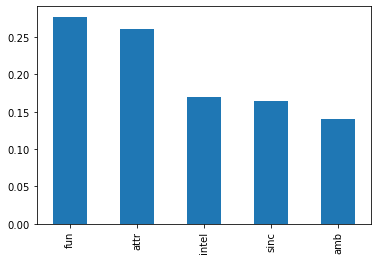

In [20]:
df_corr = df[rating].corr()
fig = abs(df_corr['match']).sort_values(ascending=False).iloc[1:].plot(kind='bar')
print(df_corr['match'].sort_values(ascending=False).iloc[1:])
fig

Of all the features studied, Fun and Attractiveness are the most correlated to a match. This means that an increase in the values of Fun and Attractiveness given to a partner will have the highest impact in a higher match score.\
Considering this, we can also start replying to the following question : How important do people think attractiveness is in potential mate selection vs. its real impact?

Attractiveness is in fact one of the two main features to predict a match behind Fun.

Is that something people do in fact anticipate ?

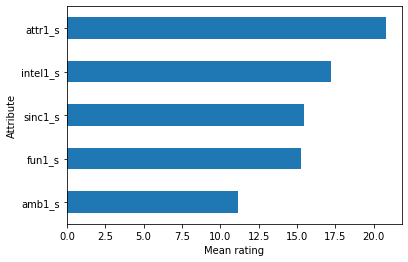

In [21]:
importance_rating_feats = ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s']

importance_rating_dict = {key: df[key].mean() for key in importance_rating_feats}

df_importance_rating = pd.DataFrame.from_dict(importance_rating_dict, orient='index', columns=['mean'])
df_importance_rating = df_importance_rating.sort_values(by='mean', ascending=True)

# Tracer le graphique en barres horizontales
ax = df_importance_rating.plot(kind='barh', legend=False)
ax.set_xlabel('Mean rating')
ax.set_ylabel('Attribute')

plt.show()

People expect Attractiveness to be the most important criteria for a match and rate Fun as the second least important. \
This contradicts what we saw before, Fun being the most important criteria in determining a successful date.

In Conclusion : How important do people think attractiveness is in potential mate selection vs. its real impact?

People rank Attractiveness as the most important criteria to determine a match when in reality it comes second, just after Fun.\
So Attractiveness is important but not as important as the participants tend to think it is.\
Also they completely underestimate the most important feature for a successful date : FUN.

We can now ask ourselves, if this consistent from male to female partners ?

2.3 : What are the least desirable attributes in a male partner? Does this differ for female partners?

In [22]:
df['attr1_s'].dropna().value_counts()

20.00    494
30.00    310
25.00    293
15.00    268
10.00    214
        ... 
23.26     10
21.43     10
3.00       6
12.96      5
6.67       5
Name: attr1_s, Length: 73, dtype: int64

In [23]:
importance_rating_feats

['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s']

In [24]:
#First, let's see the incidence of the gender on the attributes that are considered to be most important in a partner by participants :
importance_ratings_gendered = importance_rating_feats.copy()
importance_ratings_gendered.append('shar1_s')
importance_ratings_gendered.append('gender')

df_imp_ratings_gen = df[importance_ratings_gendered].dropna()
len(df_imp_ratings_gen)
df_imp_ratings_gen

,attr1_s,sinc1_s,intel1_s,fun1_s,amb1_s,shar1_s,gender
1846,16.67,16.67,16.67,16.67,16.67,16.67,0
1847,16.67,16.67,16.67,16.67,16.67,16.67,0
1848,16.67,16.67,16.67,16.67,16.67,16.67,0
1849,16.67,16.67,16.67,16.67,16.67,16.67,0
1850,16.67,16.67,16.67,16.67,16.67,16.67,0
...,...,...,...,...,...,...,...
7405,8.00,7.00,10.00,9.00,8.00,10.00,1
7406,8.00,7.00,10.00,9.00,8.00,10.00,1
7407,8.00,7.00,10.00,9.00,8.00,10.00,1
7408,8.00,7.00,10.00,9.00,8.00,10.00,1


In [25]:
df_imp_ratings_male = df_imp_ratings_gen[df_imp_ratings_gen['gender'] == 1]
df_imp_ratings_female = df_imp_ratings_gen[df_imp_ratings_gen['gender'] == 0]

First for males :

               mean
amb1_s     9.905204
shar1_s   11.473277
sinc1_s   14.448777
fun1_s    15.471694
intel1_s  16.775121
attr1_s   23.905524


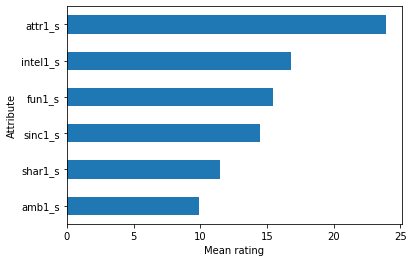

In [26]:
importance_rating_extended = ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']

extended_rating_dict = {key: df_imp_ratings_male[key].mean() for key in importance_rating_extended}

df_extended_rating_male = pd.DataFrame.from_dict(extended_rating_dict, orient='index', columns=['mean'])
df_extended_rating_male = df_extended_rating_male.sort_values(by='mean', ascending=True)

# Tracer le graphique en barres horizontales
ax = df_extended_rating_male.plot(kind='barh', legend=False)
ax.set_xlabel('Mean rating')
ax.set_ylabel('Attribute')

print(df_extended_rating_male)
plt.show()

Females : 

               mean
amb1_s    12.398644
shar1_s   13.454180
fun1_s    15.047559
sinc1_s   16.431351
attr1_s   17.641017
intel1_s  17.717819


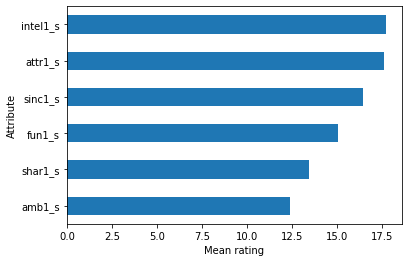

In [27]:
importance_rating_extended = ['attr1_s', 'sinc1_s', 'intel1_s', 'fun1_s', 'amb1_s', 'shar1_s']

extended_rating_dict = {key: df_imp_ratings_female[key].mean() for key in importance_rating_extended}

df_extended_rating_female = pd.DataFrame.from_dict(extended_rating_dict, orient='index', columns=['mean'])
df_extended_rating_female = df_extended_rating_female.sort_values(by='mean', ascending=True)

# Tracer le graphique en barres horizontales
ax = df_extended_rating_female.plot(kind='barh', legend=False)
ax.set_xlabel('Mean rating')
ax.set_ylabel('Attribute')

print(df_extended_rating_female)
plt.show()

In [28]:
print('Female rankings : ')
print('Standard deviation in female rankings : ', round(df_extended_rating_female['mean'].std(), 2))
print('Range : ', round(df_extended_rating_female['mean'].max() - df_extended_rating_female['mean'].min(), 2))
print()

print('Male rankings : ')
print('Standard deviation in make rankings : ', round(df_extended_rating_male['mean'].std(), 2))
print('Range : ', round(df_extended_rating_male['mean'].max() - df_extended_rating_male['mean'].min(), 2))

Female rankings : 
Standard deviation in female rankings :  2.21
Range :  5.32

Male rankings : 
Standard deviation in make rankings :  4.91
Range :  14.0


Male participants tend to be clearly more shallow than females :

* As shown with a range of 5.32 and standard deviation of 2.21 between criterias, females are a lot more balanced in what they expect in a partner whereas males seem to focus on specific criterias while completely leaving others behind, with a std of 4.91 and a range of 14
* Males : When it comes to the most important criteria, males clearly rank Attractivity above all else, with an average score of almost 24, way above intelligence, their second highest ranking criteria with a score of 16.8
* Females : Females are a lot more balanced in their ratings, they do rate intelligence & attractivity above all else and almost equivalent, at 17.6 and 17.7

We can answer the question : What are the least desirable attributes in a male partner? Does this differ for female partners?

The least desirable attribute is common to both females & males as they both rank ambition the lowest. A notable difference is that males rank it on average at 9.9 while females rank it at 12.4 which is notably higher.

2.4 : Are shared interests more important than a shared racial background?

In [29]:
rating

['attr', 'sinc', 'intel', 'fun', 'amb', 'match']

In [30]:
feat_list = ['attr', 'sinc', 'intel', 'fun', 'amb', 'shar', 'samerace', 'match']
df_race = df[feat_list]


In [31]:
df_race

,attr,sinc,intel,fun,amb,shar,samerace,match
0,6.0,9.0,7.0,7.0,6.0,5.0,0,0
1,7.0,8.0,7.0,8.0,5.0,6.0,0,0
2,5.0,8.0,9.0,8.0,5.0,7.0,1,1
3,7.0,6.0,8.0,7.0,6.0,8.0,0,1
4,5.0,6.0,7.0,7.0,6.0,6.0,0,1
...,...,...,...,...,...,...,...,...
8373,3.0,5.0,5.0,5.0,NaN,NaN,0,0
8374,4.0,6.0,8.0,4.0,4.0,NaN,0,0
8375,4.0,7.0,8.0,8.0,8.0,NaN,0,0
8376,4.0,6.0,5.0,4.0,NaN,5.0,0,0


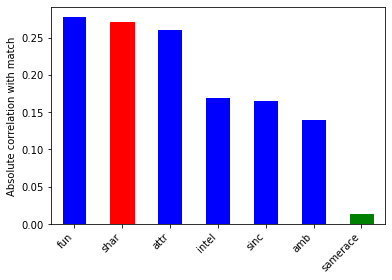

fun         0.277545
shar        0.270679
attr        0.260676
intel       0.169532
sinc        0.164449
amb         0.140042
samerace    0.013028
Name: match, dtype: float64


In [32]:
df_corr_race = df_race.corr()
sorted_corr = abs(df_corr_race['match']).sort_values(ascending=False)

# Create a list of colors for each bar in the plot
colors = ['b'] * len(sorted_corr.index[1:])

# Find the indices of the bars that correspond to the labels 'label1' and 'label2'
label1_idx = np.where(sorted_corr.index[1:] == 'shar')[0][0]
label2_idx = np.where(sorted_corr.index[1:] == 'samerace')[0][0]

# Set the colors of the bars corresponding to 'label1' and 'label2'
colors[label1_idx] = 'r'
colors[label2_idx] = 'g'

# Create the bar plot and set the tick labels and colors
fig = sorted_corr.iloc[1:].plot(kind='bar', color=colors)
fig.set_xticklabels(sorted_corr.index[1:], rotation=45, ha='right')

# Change the color of the individual bars
rects = fig.patches
rects[label1_idx].set_color('r')
rects[label2_idx].set_color('g')

plt.ylabel('Absolute correlation with match')
plt.show()

print(df_corr_race['match'].sort_values(ascending=False).iloc[1:])

In [33]:
print('Average importance participants give to being the same racial background as their speed dating partner : ', round(df['imprace'].mean(), 2),'out of 10')

Average importance participants give to being the same racial background as their speed dating partner :  3.78 out of 10


For this study, we considered the features shared interests and same race on top of the ones studied before.
It turns out that the same race feature falls behind a lot in terms of correlation with a match with the low correlation score of 0.013.
On the other hand shared interests seem like a very important feature, more important than attractivity and just behind fun, with a correlation score of 0.27 with a match.

Therefore we can confidently say that not only a shared racial background is no where close to being as important as shared interests, it also falls behind all other studied features in terms of determining if a date with a specific partner will give a match or not.

This correlates with participants feeling towards the importance of being the same racial background as their speed dating partner, on average they score it 3.78 out of 10.

Finaly let's try to answer the last question : In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

2.5. In terms of getting a second date, is it better to be someone's first speed date of the night or their last?

In [34]:
df[df['wave'] == 3]['id'].max()

10.0

In [35]:
wave_lengths = {}

for wave_num in df['wave'].unique():
    wave_subset = df[df['wave'] == wave_num]
    wave_length = wave_subset['id'].max()
    wave_lengths[wave_num] = wave_length

sorted_wave_lengths = sorted(wave_lengths.items(), key=lambda x: x[1], reverse=True)
longest_wave, longest_wave_length = sorted_wave_lengths[0]
shortest_wave, shortest_wave_length = sorted_wave_lengths[-1]

print("The longest wave is wave {}, with {} participants.".format(longest_wave, longest_wave_length))
print("The shortest wave is wave {}, with {} participants.".format(shortest_wave, shortest_wave_length))

The longest wave is wave 21, with 22.0 participants.
The shortest wave is wave 18, with 6.0 participants.


As we can see, the waves have a highly variable number of participants, we will need to create a new column that will give the value 'first' for a given wave when their partner is the first encounter, and 'last' when the partner is the last encounter, i.e. if the value in column "position" == length of the wave.

In [36]:
df['position_indicator'] = ''

for wave_num, wave_length in wave_lengths.items():
    wave_subset = df[df['wave'] == wave_num]
    df.loc[wave_subset.index[0], 'position_indicator'] = 'first'
    df.loc[wave_subset.index[-1], 'position_indicator'] = 'last'

In [37]:
df['position_indicator'] = ''

for wave_num, wave_length in wave_lengths.items():
    wave_subset = df[df['wave'] == wave_num]
    first_participant_pos = wave_subset['position'].min()
    last_participant_pos = wave_subset['position'].max()
    df.loc[(df['wave'] == wave_num) & (df['position'] == first_participant_pos), 'position_indicator'] = 'first'
    df.loc[(df['wave'] == wave_num) & (df['position'] == last_participant_pos), 'position_indicator'] = 'last'

In [42]:
#df['position_indicator'].value_counts()

Now let's correlate this with the "match" and "date_3" columns.\
The match column tells us if the date ended up on a match.\
The date_3 column tells us if the person went on a date with at least one match after the speed dating. Unfortunately we don't have more precise variables to judge if the match gave way to a date but let's see if there's a correlation between the position of the partner that night and the fact the date was a match, and then if the date gave way to a match if that person had at least one date after the event.

In [39]:
first_seen_success_rate = df[df['position_indicator'] == 'first']['match'].mean()
first_seen_conversion_rate = df[(df['position_indicator'] == 'first') & (df['match'] == 1)]['date_3'].mean()

last_seen_success_rate = df[df['position_indicator'] == 'last']['match'].mean()
last_seen_conversion_rate = df[(df['position_indicator'] == 'last') & (df['match'] == 1)]['date_3'].mean()

print(f"Success rate with first person seen: {first_seen_success_rate:.2%}")
print(f"Conversion rate with first person seen: {first_seen_conversion_rate:.2%}")
print(f"Success rate with last person seen: {last_seen_success_rate:.2%}")
print(f"Conversion rate with last person seen: {last_seen_conversion_rate:.2%}")

Success rate with first person seen: 16.61%
Conversion rate with first person seen: 54.24%
Success rate with last person seen: 14.08%
Conversion rate with last person seen: 37.14%


It seems that first dates give way to a match slightly more often than last dates (almost 2.5% more match rates).\
What is interesting to see is that people who matched with their first date of the evening have a much higher "getting at least a second date" rate than people who matched with their last date of the evening.

Conclusion : \
we cannot precisely conclude to the question : In terms of getting a second date, is it better to be someone's first speed date of the night or their last? since we don't know if the second date was obtained with that same person that was a first date or a last date, but we can conclude this :

Matching with your first date of the evening of the speed dating event does give you a higher chance of obtaining a second date (54.24%) than does matching with your last date of the evening (37.14%).\
Maybe this can be explained by the fact that a match on the first date is more genuine than a match on the last date, which could come out of "despair", people lowering their expectations as the evening goes by in order to obtain a date.
